# 08. PCA

In [7]:
from fixedincome2025 import table

## Modeling Yield Curve Movements

* Although the below curve has 14 points, when we model this curve's movement, we should not model it by 14 independent random variables

In [6]:
table('yc_10092025').T

,1m,1.5m,2m,3m,4m,6m,1y,2y,3y,5y,7y,10y,20y,30y
Yield,4.2%,4.17%,4.11%,4.03%,3.95%,3.83%,3.66%,3.6%,3.59%,3.74%,3.92%,4.14%,4.7%,4.72%


* Rates for nearby maturities on the curve tend to move together—both in direction and magnitude—because the corresponding bonds are close substitutes.
    * If 2y bond is too expensive, investors with the need can just buy 3y bond
    * If borrowing for 2y is too expensive, investors can just borrow for 3y
* As we will see now, principal component analysis (PCA) tells us 3 independent random variables are enough
* First we need some math

## Singular Value Decomposition

* Every $m\times n$ matrix $X$ can be written as
$$
X = USV^{\mathsf T}, 
$$
where
    * $U$ is an $m\times m$ unitary matrix (more on unitary matrices later)
    * $V$ is an $n\times n$ unitary matrix
    * $S$ is an $m\times n$ matrix with nonzero entries only on the main diagonal, meaning if $S=(s_{i,j})$, then $s_{i,j} \neq 0$ only when $i = j$

## The $S$ Matrix

$$
S = \begin{pmatrix}
s_{1, 1} & 0 & \cdots & 0\\ 
0 & s_{2, 1} & \cdots & 0\\ 
\vdots & \vdots & \ddots & \vdots\\ 
0 & 0 & \cdots & s_{n, n}\\ 
\vdots & \vdots & \vdots & \vdots\\ 
0 & 0 & \cdots & 0\\ 
\end{pmatrix}_{m\times n}
$$

## Unitary Matrix

* Recall that $X_{m\times n} = USV^{\mathsf T}$, where $U_{m\times m}$ and $V_{n\times n}$ are both unitary
* Definition: A matrix $V_{n\times n}$ is said to be unitary if $V^{\mathsf T}V = I_n$, the $n\times n$ identity matrix
* Easy to compute inverse: $V^{-1} = V^{\mathsf T}$ by definition
* Let
$$
V = \begin{pmatrix}
|&|&  & | \\
v_1 & v_2 & \cdots & v_n \\
|&|&  & | \\
\end{pmatrix}, 
$$
where $v_j$ are column vectors

## Unitary Matrix (Cont.)

* $V^{\mathsf T}V = I_n$: 
\begin{align*}
V^{\mathsf T}V &= \begin{pmatrix}
\frac{\qquad}{} & v_1 & \frac{\qquad}{} \\
\frac{\qquad}{} & v_2 & \frac{\qquad}{} \\
& \vdots & \\
\frac{\qquad}{} & v_n & \frac{\qquad}{} \\
\end{pmatrix}
\begin{pmatrix}
|&|&  & | \\
v_1 & v_2 & \cdots & v_n \\
|&|&  & | \\
\end{pmatrix}\\
&= \begin{pmatrix}
\langle v_1, v_1\rangle & \langle v_1, v_2\rangle & \cdots & \langle v_1, v_n\rangle\\
\langle v_2, v_1\rangle & \langle v_2, v_2\rangle & \cdots & \langle v_2, v_n\rangle\\
\vdots&\vdots&\ddots&\vdots \\
\langle v_n, v_1\rangle & \langle v_n, v_2\rangle & \cdots & \langle v_n, v_n\rangle
\end{pmatrix} = \begin{pmatrix}
1 & 0 & \cdots & 0\\
0 & 1 & \cdots & 0\\
\vdots&\vdots&\ddots&\vdots \\
0 & 0 & \cdots & 1
\end{pmatrix}, 
\end{align*}
where $\langle \cdot, \cdot\rangle$ stands for the inner product of two vectors
* Unitary means
    * The column vectors have *norm* 1 and
    * Inner product of any two different column vectors is 0

## Vector Norm

* Let $\vec a = (a_1, a_2, \ldots, a_n)^{\mathsf T}$ be a column vector. Then its norm is
\begin{align*}
\lVert \vec a \rVert = \sqrt{\langle a, a\rangle} = \sqrt{a_1^2 + a_2^2 + \cdots + a_n^2}. 
\end{align*}
* Norm is the "length" of a vector in high dimensions

## Zero Inner Product

* Two vectors having zero inner product basically means they are "perpendicular"
* Take 2D as an example. If $v_1$ and $v_2$ are in 2D and $\langle v_1, v_2\rangle = 0$, write
\begin{align*}
v_1 &= (r_1 \cos \theta_1, r_1 \sin \theta_1)^{\mathsf T}, \\
v_2 &= (r_2 \cos \theta_2, r_2 \sin \theta_2)^{\mathsf T}. 
\end{align*}
Then $\langle v_1, v_2\rangle = 0$ means
\begin{align*}
r_1 r_2 (\cos \theta_1 \cos \theta_2 + \sin \theta_1\sin \theta_2) = r_1 r_2 \cos (\theta_1 - \theta_2) = 0. 
\end{align*}
So $\theta_1 - \theta_2 = 90^{\circ}$ (plus multiples of $180^{\circ}$), so $v_1$ and $v_2$ are perpendicular

## Perpendicular in 2D

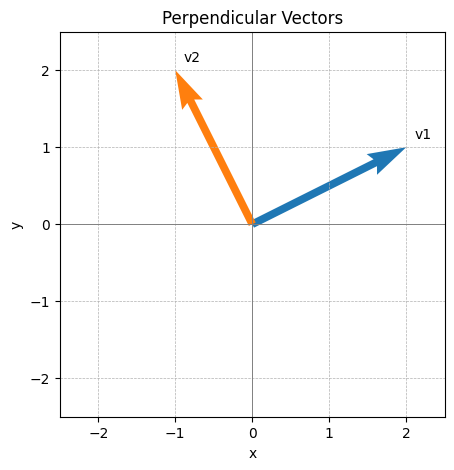

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Example vectors in 2D
v1 = np.array([2.0, 1.0])
# perpendicular vector obtained by rotating v1 by 90 degrees: [-y, x]
v2 = np.array([-v1[1], v1[0]])

fig, ax = plt.subplots(figsize=(5,5))
# draw thin axes lines
ax.axhline(0, color='gray', linewidth=0.7)
ax.axvline(0, color='gray', linewidth=0.7)

# plot vectors using quiver so lengths are respected
ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='C0', width=0.02)
ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='C1', width=0.02)

# annotate tips
ax.annotate('v1', xy=(v1[0], v1[1]), xytext=(6,6), textcoords='offset points')
ax.annotate('v2', xy=(v2[0], v2[1]), xytext=(6,6), textcoords='offset points')

# determine symmetric plot limits and enforce equal aspect ratio
max_coord = np.max(np.abs(np.vstack((v1, v2)))) * 1.25
ax.set_xlim(-max_coord, max_coord)
ax.set_ylim(-max_coord, max_coord)
ax.set_aspect('equal', adjustable='box')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Perpendicular Vectors')
ax.grid(True, linestyle='--', linewidth=0.5)
plt.show()

* Perpendicular In 3d (at most 3) and nd, put the vectors together to get unitary matrix
* Inner product definition? 